# Data Science com Python

#### Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import os

#### Gerando amostras aleatórias

##### Amostra Aleatória

In [ ]:
amostra=np.random.choice(a=[0,1],       # Opções
                         size=150,      # Tamanho da amostra;
                         replace=True,  # Se pode haver repetição;
                         p=[0.5,0.5])   # Probabilidade de cada elemento ser selecionado;
amostra

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
len(amostra[amostra == 1])

74

In [ ]:
len(amostra[amostra == 0])

76

In [ ]:
obj = {'num': np.random.choice(a=[1,2,3,4,5],            # Opções
                               size=30,                  # Tamanho da amostra;
                               replace=True,             # Se pode haver repetição;
                               p=[0.2,0.2,0.2,0.2,0.2]), # Probabilidade de cada elemento ser selecionado;
       'cat': np.random.choice(a=["a","b","c","d","e"], size=30, replace=True, p=[0.2,0.2,0.2,0.2,0.2])}

base = pd.DataFrame(data=obj)          # Fazendo minha própria tabelinha
base.head()

,num,cat
0,2,c
1,1,e
2,4,d
3,1,a
4,1,a


In [ ]:
base['num'].value_counts() # Mostra quantas vezes aparece cada um dos valores

1    11
4     7
2     4
5     4
3     4
Name: num, dtype: int64

##### Amostra Estratificada

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x,_,y,_= train_test_split(base.iloc[:,0:2],base.iloc[:,1], # o traço é usado pra evitar que a variável receba o complemento da base de dados
                   test_size = 0.75,  # Tamanho da amostra a ser retirada (mas parace que acontece o contrário)
                   stratify=base.iloc[:,1]) # Categoria que é a base para a estratificação;
x

,num,cat
6,2,a
28,4,c
2,4,d
15,2,e
14,2,a
24,4,b
18,4,d


In [ ]:
y.value_counts()

a    2
d    2
c    1
e    1
b    1
Name: cat, dtype: int64

##### Amostra sistemática

In [ ]:
from math import ceil # função para arredondamento

In [ ]:
pop = 30
amostra = 5
k = pop/amostra

In [ ]:
r = np.random.randint(low=1, high = k+1, size = 1) #gerar amostras de números inteiros
sorteados=[]
acumulador=r[0] #pra mostrar o valor do r
for i in range(amostra):
    sorteados.append(acumulador)
    acumulador += k
    
sorteados

[4, 10.0, 16.0, 22.0, 28.0]

In [ ]:
base.loc[sorteados] #nesse .loc parece que ele pega todos os valores correspondntes a uma linha 

,num,cat
4.0,1,a
10.0,1,b
16.0,3,e
22.0,5,e
28.0,4,a


### Medidas de Centralidade e Variabilidade

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
jogadores=[2, 5, 6, 2, 9, 8, 3, 5]
np.mean(jogadores)

5.0

In [ ]:
np.median(jogadores)

5.0

In [ ]:
np.quantile(jogadores,[0,0.5,1])

array([2., 5., 9.])

In [ ]:
np.std(jogadores, ddof=1) # o ddof para calcular o desvio amostral

2.6186146828319083

In [ ]:
stats.describe(jogadores)

DescribeResult(nobs=8, minmax=(2, 9), mean=5.0, variance=6.857142857142857, skewness=0.2551551815399144, kurtosis=-1.2083333333333333)

### Probabilidade 

##### Distribuição Binomial

In [ ]:
from scipy.stats import binom

In [ ]:
binom.pmf(3,5,0.3) #P(X=3), X~Bin(5,0.3)

0.13229999999999992

In [ ]:
binom.cdf(3,5,0.3) #P(X<=3), X~Bin(5,0.3)

0.96922

##### Distribuição Normal

In [ ]:
from scipy.stats import norm

In [ ]:
norm.cdf(6,8,2) #P(X<6), X~Normal(8, desvio padrão=2)

0.15865525393145707

In [ ]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

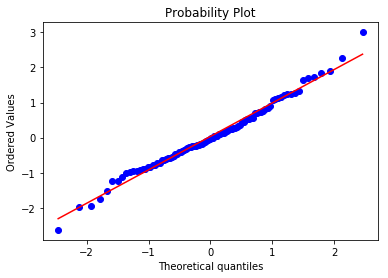

In [ ]:
dados = norm.rvs(size=100) # Gera uma amostra a partir de uma distribuição Normal;
stats.probplot(dados, plot = plt) # QQplot para verificar Normalidade;

In [ ]:
stats.shapiro(dados) #Teste de Shapiro-Wilk, primeiro retorna a Estatística de teste, depois o p-valor

(0.9888631701469421, 0.5738451480865479)

##### Distribuição T de Student

In [ ]:
from scipy.stats import t

In [ ]:
t.cdf(1.5,8) #P(X<1.5), X~T-Student, gl=8

0.9139983540240443

In [ ]:
t.sf(1.5,8) #P(X>1.5), X~T-Student, gl=8

0.08600164597595565

##### Distribuição Poisson

In [ ]:
from scipy.stats import poisson 

In [ ]:
poisson.pmf(3,2) #P(X=3), X~Poisson(2)

0.18044704431548356

In [ ]:
poisson.cdf(3,2) #P(X<=3), X~Poisson(2)

0.857123460498547

In [ ]:
poisson.sf(3,2) #P(X>3), X~Poisson(2)

0.14287653950145296

### Teste de Independência

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
novela = np.array([[19,6],[43,32]])
novela

array([[19,  6],
       [43, 32]])

In [ ]:
chi2_contingency(novela) # Teste de Independêcia ChiQuadrado
# Primerio valor é a Est. de Teste, o segundo é o p-valor, o terceiro é o grau de liberdade e o último é 
# o array caso a matriz fosse independente.

(2.037351443123939, 0.15347667161786666, 1, array([[15.5,  9.5],
        [46.5, 28.5]]))

### Análise de Regressão

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
obj={"vel": np.random.choice(a=[30,40,50,60,70], size = 50, replace = True, p = [0.2,0.2,0.2,0.2,0.2]),
     "dist": np.random.choice(a=[100,150,200,250,300], size = 50, replace = True, p = [0.2,0.2,0.2,0.2,0.2]),
     "teste":[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}

base=pd.DataFrame(data=obj)

In [ ]:
base = base.drop(["teste"], axis=1) #Tirar informações do banco de dados, o axis=1 representa a retirada por coluna

In [ ]:
x = base.iloc[:,1].values
y = base.iloc[:,0].values

In [ ]:
x

array([250, 200, 250, 150, 100, 150, 300, 100, 250, 300, 300, 150, 250,
       250, 250, 150, 200, 200, 250, 100, 100, 150, 150, 100, 150, 100,
       150, 150, 200, 300, 100, 100, 100, 200, 100, 150, 250, 250, 100,
       100, 250, 250, 100, 250, 200, 250, 150, 200, 200, 100])

In [ ]:
y

array([30, 70, 40, 60, 30, 30, 40, 30, 70, 60, 40, 60, 70, 60, 40, 30, 40,
       50, 50, 30, 60, 40, 30, 60, 40, 50, 60, 40, 30, 40, 60, 70, 50, 50,
       60, 40, 30, 70, 40, 70, 60, 30, 50, 50, 70, 70, 70, 40, 30, 60])

In [ ]:
correlacao = np.corrcoef(x,y) #Para fazer a análise de Correlação
correlacao

array([[ 1.        , -0.03980294],
       [-0.03980294,  1.        ]])

In [ ]:
x=x.reshape(-1,1) #Colocando no formato para usar na fórmula do modelo
x

array([[200],
       [150],
       [200],
       [250],
       [200],
       [150],
       [250],
       [200],
       [250],
       [300],
       [300],
       [300],
       [100],
       [300],
       [250],
       [100],
       [150],
       [200],
       [100],
       [150],
       [100],
       [300],
       [100],
       [250],
       [150],
       [100],
       [200],
       [100],
       [150],
       [200],
       [150],
       [300],
       [150],
       [200],
       [100],
       [100],
       [200],
       [150],
       [300],
       [250],
       [200],
       [200],
       [150],
       [300],
       [150],
       [250],
       [200],
       [250],
       [250],
       [100]])

In [ ]:
modelo = LinearRegression() # Ajustando uma regressão linear
modelo.fit(x,y)

LinearRegression()

In [ ]:
modelo.intercept_ # Verificando o intercepto

52.296231375985975

In [ ]:
modelo.coef_

array([-0.00771253])

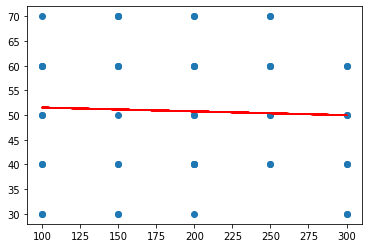

In [ ]:
plt.scatter(x,y) # Gráfico de Dispersão
plt.plot(x, modelo.predict(x), color = "red") # Para plotar a reta esperada

In [ ]:
modelo._residues # Mostra a soma dos resíduos

10241.242180518318

In [ ]:
from yellowbrick.regressor import ResidualsPlot #T

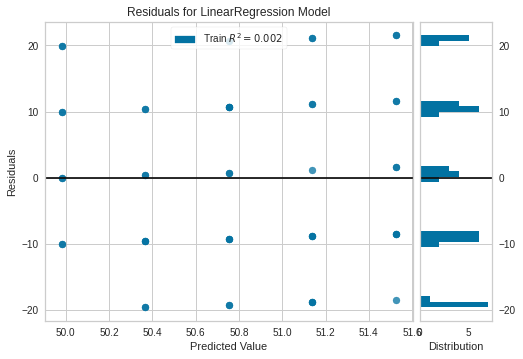

In [ ]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(x,y)
visualizador.poof()

### Anova

In [ ]:
obj={'sexo':["F","F","F","F","M","M","M","M","F","F","F","F","M","M","M","M","F","F","F","F","M","M","M","M"],
     'remédio':["A","A","A","A","A","A","A","A","B","B","B","B","B","B","B","B","C","C","C","C","C","C","C","C"],
     'horas':[5,10,7,7,7,6,9,9,5,5,5,8,7,8,10,7,10,10,6,6,10,6,10,5]}

trat = pd.DataFrame(data=obj)

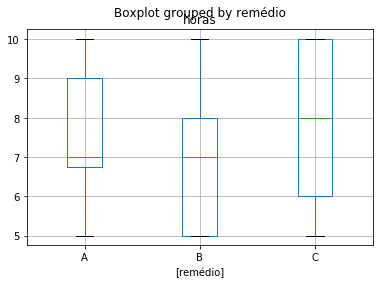

In [ ]:
from scipy import stats
trat.boxplot(by='remédio')

In [ ]:
import statsmodels.api as sm             
from statsmodels.formula.api import ols 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
modelo1 = ols('horas ~ remédio', data = trat).fit() 
resultados1 = sm.stats.anova_lm(modelo1, typ = 1) # ANOVA tipo 1
print(resultados1)

            df     sum_sq   mean_sq         F    PR(>F)
remédio    2.0   4.083333  2.041667  0.537618  0.591966
Residual  21.0  79.750000  3.797619       NaN       NaN


In [ ]:
# mc = MultiComparison(trat['horas'], trat['remédio'])  # Teste de Tukey;
# resultado_teste = mc.tukeyhsd()
# print(resultado_teste)

### Outliers

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
obj = {'num': [4, 3, 5, 3, 5, 3, 4, 3, 2, 3, 78]}
base = pd.DataFrame(data = obj) 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f825c776128>,
 'caps': [<matplotlib.lines.Line2D at 0x7f825c7767b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f825c76cf98>,
 'medians': [<matplotlib.lines.Line2D at 0x7f825c776e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f825c6ff1d0>,
 'means': []}

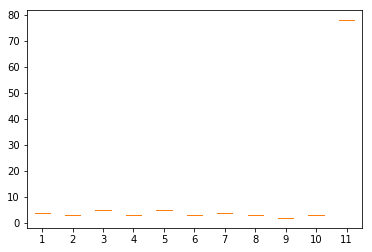

In [ ]:
plt.boxplot(base.iloc[:,], showfliers = True) 

### Séries Temporais

In [ ]:
datas=[]
for ano in range(1949,1952):
    for mes in range(1,13):
        datas.append(str(ano)+"-"+str(mes))
info=[112,118,132,129,121,135,148,148,136,119,104,118,
      115,126,141,135,125,149,170,170,158,133,114,140,
      145,150,178,163,172,178,199,199,184,162,146,166]
obj={'datas':datas,'info':info}

airp=pd.DataFrame(data=obj)
airp

,datas,info
0,1949-1,112
1,1949-2,118
2,1949-3,132
3,1949-4,129
4,1949-5,121
5,1949-6,135
6,1949-7,148
7,1949-8,148
8,1949-9,136
9,1949-10,119


In [ ]:
print(airp.dtypes) #Tem que mudar o tipo objeto

datas    object
info      int64
dtype: object


In [ ]:
dataparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m') 

In [ ]:
airp2 = pd.Series(info, index = datas) 
airp2

1949-1     112
1949-2     118
1949-3     132
1949-4     129
1949-5     121
1949-6     135
1949-7     148
1949-8     148
1949-9     136
1949-10    119
1949-11    104
1949-12    118
1950-1     115
1950-2     126
1950-3     141
1950-4     135
1950-5     125
1950-6     149
1950-7     170
1950-8     170
1950-9     158
1950-10    133
1950-11    114
1950-12    140
1951-1     145
1951-2     150
1951-3     178
1951-4     163
1951-5     172
1951-6     178
1951-7     199
1951-8     199
1951-9     184
1951-10    162
1951-11    146
1951-12    166
dtype: int64

In [ ]:
type(airp)

pandas.core.frame.DataFrame

In [ ]:
type(airp2)

pandas.core.series.Series

In [ ]:
airp3 = airp['info'] 
airp3

0     112
1     118
2     132
3     129
4     121
5     135
6     148
7     148
8     136
9     119
10    104
11    118
12    115
13    126
14    141
15    135
16    125
17    149
18    170
19    170
20    158
21    133
22    114
23    140
24    145
25    150
26    178
27    163
28    172
29    178
30    199
31    199
32    184
33    162
34    146
35    166
Name: info, dtype: int64

In [ ]:
type(airp3)

pandas.core.series.Series

In [ ]:
airp2[0]

112

In [ ]:
airp2['1949-1']

112

In [ ]:
airp2['1949-1':'1949-12']

1949-1     112
1949-2     118
1949-3     132
1949-4     129
1949-5     121
1949-6     135
1949-7     148
1949-8     148
1949-9     136
1949-10    119
1949-11    104
1949-12    118
dtype: int64

In [ ]:
airp2.index.max()

'1951-9'

In [ ]:
airp2.index.min()

'1949-1'

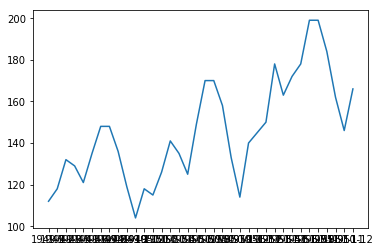

In [ ]:
plt.plot(airp2)

##### Decomposição da Série

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 

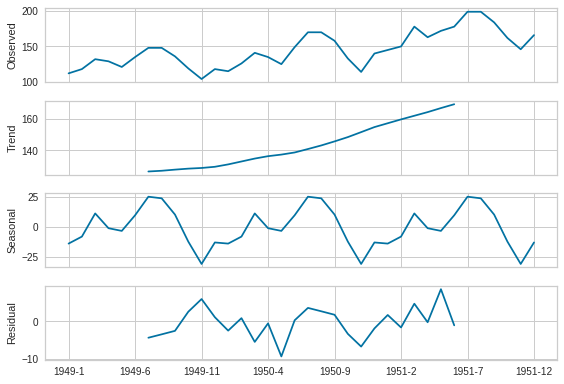

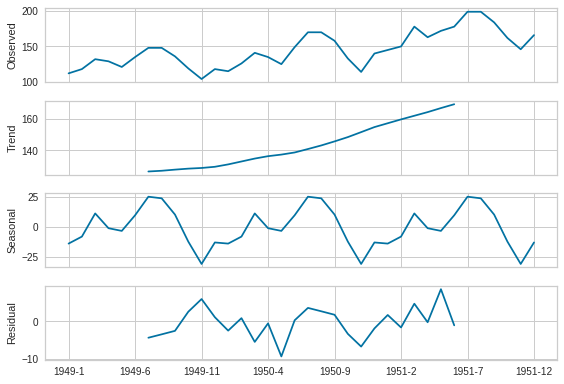

In [ ]:
seasonal_decompose(airp2, model = 'additive', freq = 12).plot()

##### Previsão

In [ ]:
airp2.mean()

145.5

In [ ]:
airp2['1951-1':'1951-12'].mean()

170.16666666666666

In [ ]:
mediamovel=airp2.rolling(window=12).mean()

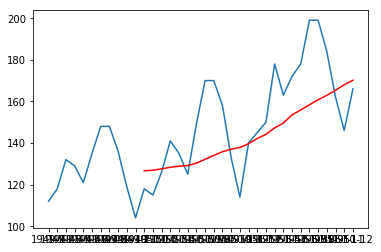

In [ ]:
plt.plot(airp2)
plt.plot(mediamovel,color='red')

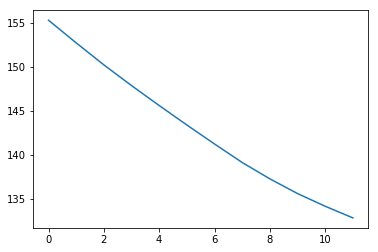

In [ ]:
previsoes=[]
for i in range (1,13):
    superior=len(mediamovel)-i
    inferior=superior-11
    previsoes.append(mediamovel[inferior:superior].mean())
previsoes=previsoes[::1]
plt.plot(previsoes)   